In [1]:
import tensorflow as tf

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "dog_cat_photos/train",
    image_size=(224, 224),
    label_mode="binary",
    batch_size=32,
    shuffle=True
)

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "dog_cat_photos/test",
    image_size=(224, 224),
    label_mode="binary",
    batch_size=32,
    shuffle=False
)
list(train_dataset.as_numpy_iterator())[0]

class_names = train_dataset.class_names
class_names


Found 300 files belonging to 2 classes.
Found 100 files belonging to 2 classes.


2025-08-29 19:32:41.632264: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


['cat', 'dog']

2025-08-29 19:32:41.692642: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


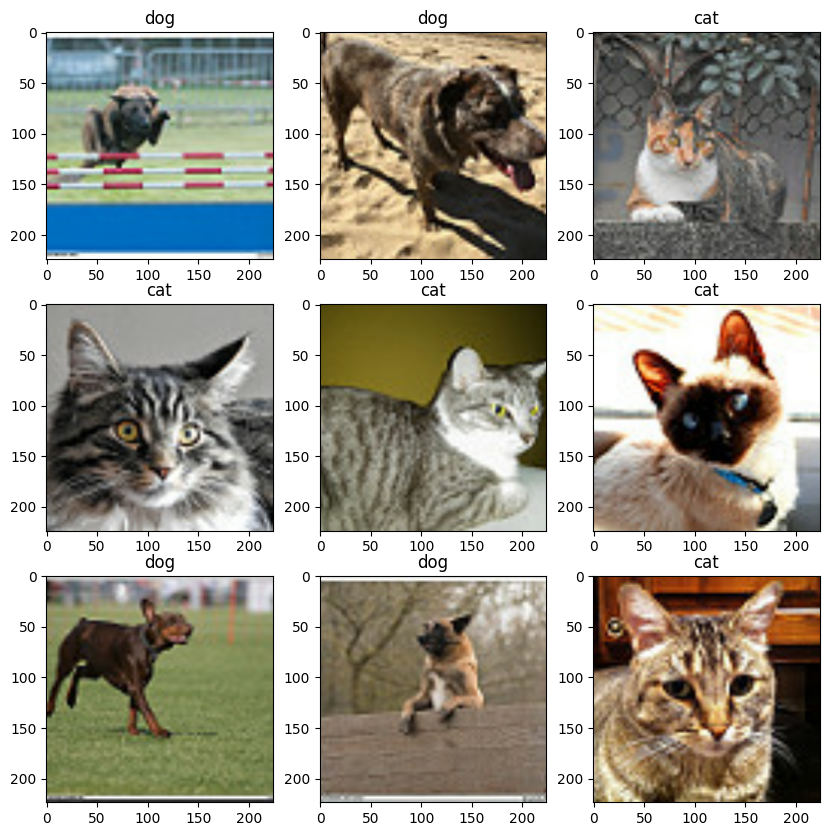

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i].numpy().astype("uint8")[0]])

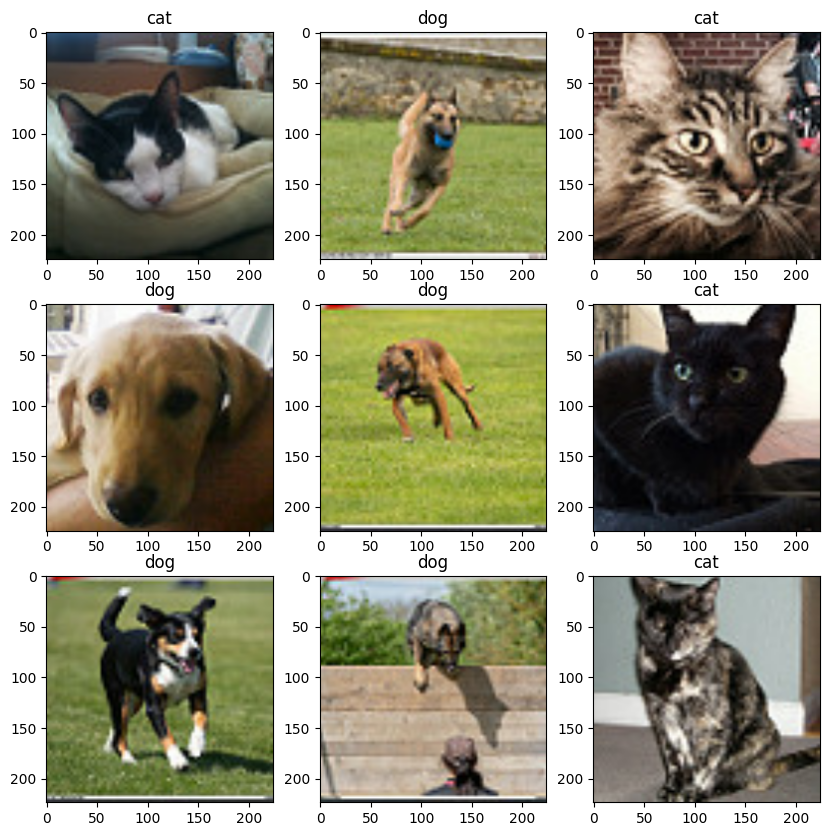

In [ ]:
def flip_left_right(image, label):   # 左右反転
    image = tf.image.flip_left_right(image)
    return image, label

def flip_up_down(image, label):      # 上下反転
    image = tf.image.flip_up_down(image)
    return image, label

def rot90(image, label):             # 反時計回りに90度回転
    image = tf.image.rot90(image)
    return image, label

def rot180(image, label):            # 反時計回りに180度回転
    image = tf.image.rot90(image, k=2)
    return image, label

def rot270(image, label):            # 反時計回りに270度回転
    image = tf.image.rot90(image, k=3)
    return image, label

train_dataset_lr     = train_dataset.map(flip_left_right)
train_dataset_ud     = train_dataset.map(flip_up_down)
train_dataset_rot90  = train_dataset.map(rot90)
train_dataset_rot180 = train_dataset.map(rot180)
train_dataset_rot270 = train_dataset.map(rot270)

train_dataset = train_dataset.concatenate(train_dataset_lr)
train_dataset = train_dataset.concatenate(train_dataset_ud)
train_dataset = train_dataset.concatenate(train_dataset_rot90)
train_dataset = train_dataset.concatenate(train_dataset_rot180)
train_dataset = train_dataset.concatenate(train_dataset_rot270)

train_dataset = train_dataset.shuffle(32)

plt.figure(figsize=(10, 10))

for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i].numpy().astype("uint8")[0]])

In [4]:


input_layer = tf.keras.Input(shape=(224, 224, 3))   # 入力層
l_layer = tf.keras.applications.mobilenet_v2.preprocess_input(input_layer)   # 前処理（正規化）をする層

base_model = tf.keras.applications.mobilenet_v2.MobileNetV2(
    input_shape=(224, 224, 3),
    input_tensor=l_layer,
    include_top=False,
    weights="imagenet",
    pooling='avg'
)
base_model.trainable = False

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [7]:
output_layer = tf.keras.layers.Dense(1, activation='sigmoid')

model = tf.keras.Sequential([
    base_model,
    output_layer
])
model.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=["accuracy"])

In [8]:
model.fit(train_dataset, epochs=20)

Epoch 1/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 122ms/step - accuracy: 0.7861 - loss: 0.4585
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 125ms/step - accuracy: 0.9228 - loss: 0.2191
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 122ms/step - accuracy: 0.9433 - loss: 0.1685
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 126ms/step - accuracy: 0.9561 - loss: 0.1392
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 123ms/step - accuracy: 0.9650 - loss: 0.1169
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 126ms/step - accuracy: 0.9700 - loss: 0.1015
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 134ms/step - accuracy: 0.9806 - loss: 0.0874
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 132ms/step - accuracy: 0.9822 - loss: 0.0791
Epoch 9/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 129ms/step - accuracy: 0.9856 - loss: 0.0707
Epoch 10/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - accuracy: 0.9883 - loss: 0.0632
Epoch 11/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 131ms/step - accuracy: 0.9911 - loss: 0.0570
Epoch 12/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 129ms/step

In [10]:
pred_data = model.predict(test_dataset)
pred_data

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step


array([[4.3331424e-05],
       [1.7321610e-04],
       [4.6369601e-05],
       [2.3577970e-03],
       [4.2774482e-04],
       [1.4671726e-04],
       [3.4959879e-04],
       [5.2086497e-04],
       [2.2049711e-05],
       [1.8236901e-04],
       [4.2267791e-05],
       [4.5926166e-03],
       [3.8892010e-03],
       [5.7128607e-04],
       [4.1233503e-05],
       [4.2665597e-06],
       [6.5912078e-05],
       [3.6706499e-04],
       [3.0515604e-03],
       [2.2311187e-03],
       [1.0626960e-02],
       [8.0816969e-02],
       [3.4539334e-03],
       [8.5012731e-04],
       [1.9576447e-01],
       [1.2717458e-03],
       [1.5419138e-03],
       [5.8428646e-04],
       [1.1740945e-02],
       [2.7206773e-04],
       [8.1623311e-04],
       [6.5324247e-01],
       [3.1301813e-04],
       [8.6982804e-04],
       [6.7355344e-03],
       [8.6035883e-01],
       [5.3085117e-03],
       [1.4966133e-03],
       [1.8480029e-02],
       [2.2159674e-04],
       [3.3986912e-04],
       [7.419736

In [11]:
model.evaluate(test_dataset)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - accuracy: 0.9600 - loss: 0.0686


[0.06858276575803757, 0.9599999785423279]